### METHOD 2 : RANDOM SAMPLE IMPUTATION 

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values.It assumes that the data are missing completely at random(MCAR)

In [1]:
import pandas as pd

In [23]:
df = pd.read_csv("train.csv",usecols = ['Age',"Fare",'Survived'])
df.isnull().sum()

# print(df.shape)

Survived      0
Age         177
Fare          0
dtype: int64

In [24]:
print(df['Age'].dropna().sample()) # drop the null values in age and then pick a random value 

# now these values have to replace the null values , so :

print(df['Age'].dropna().sample(df["Age"].isnull().sum(),random_state = 30))

# take the values from the age which are not null and then replace the values which are null

print(df.shape)

577    39.0
Name: Age, dtype: float64
349    42.0
808    39.0
380    42.0
845    42.0
96     71.0
       ... 
556    48.0
623    21.0
331    45.5
267    25.0
482    50.0
Name: Age, Length: 177, dtype: float64
(891, 3)


In [15]:
# now indexing of these NULL are not proper , so we need to change them before merging

df[df["Age"].isnull()].index

Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
       ...
       832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
      dtype='int64', length=177)

In [16]:
def impute_NAN(df,variable,median):
    
    df[variable+"_median"] = df[variable].fillna(median) # fillna -> replace the NULL values with the specified value
    df[variable+"_random"] = df[variable] # make a copy

    # fill the NAN values with the random values which are not null
    random_sample = df[variable].dropna().sample(df[variable].isnull().sum(),random_state = 30)

    # indexing should match 
    random_sample.index = df[df[variable].isnull()].index

    # wherever variable is NULL , go to new col same row and replace it there 
    df.loc[df[variable].isnull(),variable+"_random"] = random_sample
    
    return df

In [19]:
impute_NAN(df,"Age",df["Age"].median())

df.head(5)

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [20]:
df.isnull().sum()

Survived        0
Age           177
Fare            0
Age_median      0
Age_random      0
dtype: int64

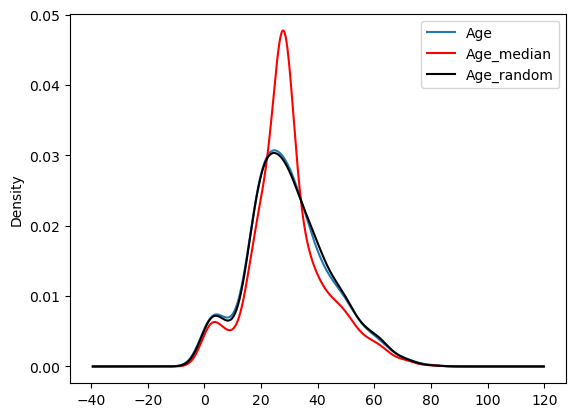

In [22]:
# Kernet Density Estimators !
from matplotlib import pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='black')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')


# clearly the distribution is very close to the variable !! -> almost no change 